In [3]:

## Step 1: Load the Dataset
#We will load the intrusion dataset into our Jupyter Notebook and inspect its structure.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
intrusion_data = pd.read_csv('intrusion.csv')


In [11]:
intrusion_data.head()

,Attribute1,Attribute2,Attribute3,Intrusion
0,2.157322,1.922947,3.223735,0
1,1.711650,5.534262,1.519069,0
2,-1.062710,0.913824,0.715046,0
3,-0.100344,6.153463,2.250014,0
4,0.145073,6.553025,2.214019,0


In [13]:
intrusion_data.tail()

,Attribute1,Attribute2,Attribute3,Intrusion
10095,1.249903,5.662992,4.399133,0
10096,-1.528386,6.275631,0.829751,0
10097,1.878522,1.958191,1.517479,0
10098,1.966711,4.945319,-2.253687,0
10099,-1.607192,5.527978,0.472475,0


In [15]:
## Step 2: Scatter Plot of Attribute 1 vs Attribute 2
#We will create a scatter plot for attributes 1 and 2 where the points are coloured by the "Intrusion" label.


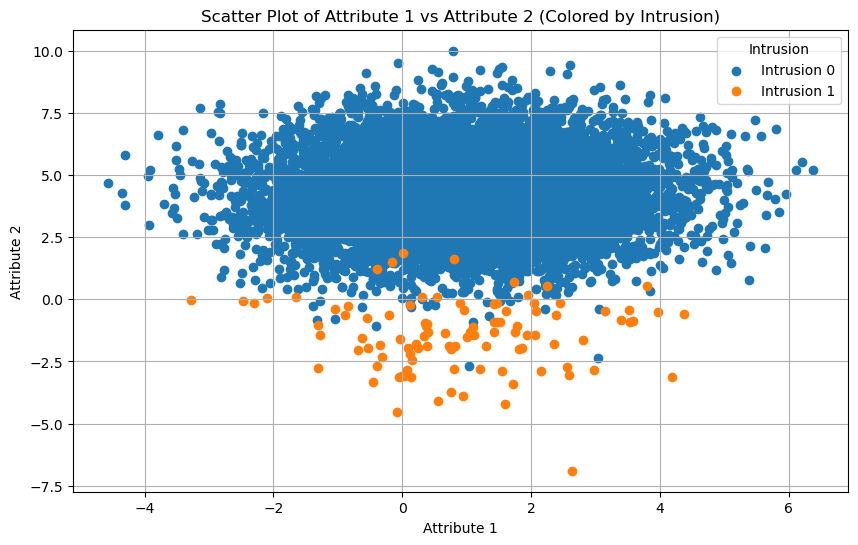

In [21]:
plt.figure(figsize=(10, 6))
for label in intrusion_data['Intrusion'].unique():
    subset = intrusion_data[intrusion_data['Intrusion'] == label]
    plt.scatter(subset['Attribute1'], subset['Attribute2'], label=f'Intrusion {label}')

# Add title and labels
plt.title('Scatter Plot of Attribute 1 vs Attribute 2 (Colored by Intrusion)')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')

# Add legend
plt.legend(title="Intrusion")

# Add grid for better readability
plt.grid(True)
plt.show()

In [23]:
##Scatter Plot of Attribute 2 vs Attribute 3
#we will create a scatter plot for Attributes 2 and 3,  colored by the "Intrusion" label.


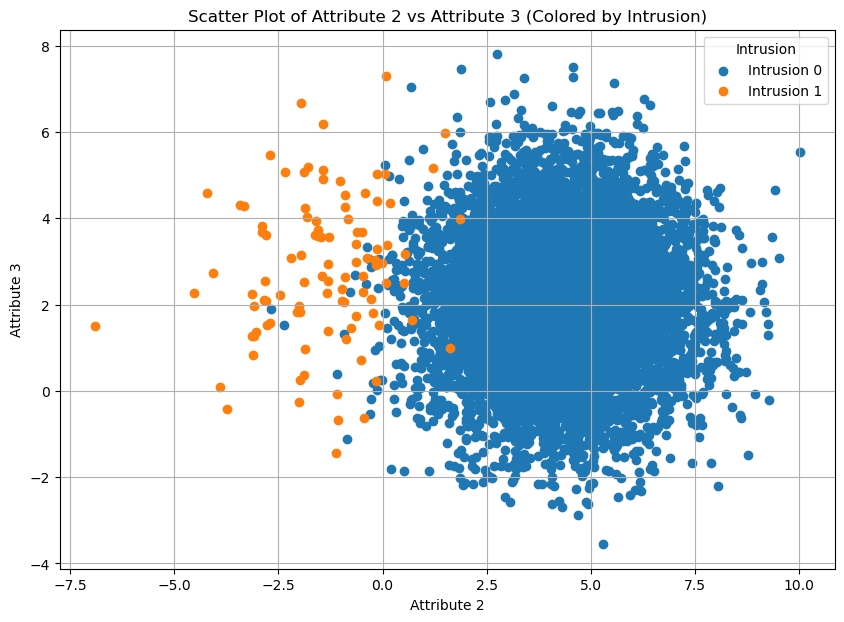

In [57]:
plt.figure(figsize=(10, 7))
for label in intrusion_data['Intrusion'].unique():
    subset = intrusion_data[intrusion_data['Intrusion'] == label]
    plt.scatter(subset['Attribute2'], subset['Attribute3'], label=f'Intrusion {label}')

# Adding title and labels
plt.title('Scatter Plot of Attribute 2 vs Attribute 3 (Colored by Intrusion)')
plt.xlabel('Attribute 2')
plt.ylabel('Attribute 3')

# Adding legend to the chart
plt.legend(title="Intrusion")

plt.grid(True)

plt.show()


In [27]:
# 3: Splitting the intrusion_data into Train and Test Sets
#We split into 80-20 ass more data for training will help in accurate predictions



In [29]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = intrusion_data[['Attribute1', 'Attribute2', 'Attribute3']]
y = intrusion_data['Intrusion']

# Split the dataset into train and tests sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8080, 3), (2020, 3), (8080,), (2020,))

In [31]:
# 4: Training a Support Vector Classifier with Poly, Linear, and RBF Kernels


In [33]:
# Import SVC from sklearn and accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Creating dictionaries to store models and accuracies
models = {}
accuracies = {}

# Train a SVC with Poly kernel
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, y_train)
y_pred_poly = svc_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
models['Poly Kernel'] = svc_poly
accuracies['Poly Kernel'] = accuracy_poly

# Train a SVC with Linear kernel
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
models['Linear Kernel'] = svc_linear
accuracies['Linear Kernel'] = accuracy_linear

# Train a SVC with RBF kernel
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
models['RBF Kernel'] = svc_rbf
accuracies['RBF Kernel'] = accuracy_rbf

# Display the accuracies of each model
accuracies


{'Poly Kernel': 0.999009900990099,
 'Linear Kernel': 0.999009900990099,
 'RBF Kernel': 0.998019801980198}

In [35]:
#5 Creating confusion matrix for each of the SVC classifiers 

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

# Function to output labeled confusion matrix and classification report
def evaluate_model(y_test, y_pred, kernel_name):
    print(f"Evaluation for {kernel_name} Kernel:\n")
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Extract TP, TN, FP, FN
    TN, FP, FN, TP = cm.ravel()
    
    # Print labeled confusion matrix results
    print(f"Confusion Matrix for {kernel_name} Kernel:")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Intrusion', 'Intrusion']))
    print("-" * 50)

# Evaluating Poly kernel SVC
y_pred_poly = models['Poly Kernel'].predict(X_test)
evaluate_model(y_test, y_pred_poly, "Poly")

# Evaluating Linear kernel SVC
y_pred_linear = models['Linear Kernel'].predict(X_test)
evaluate_model(y_test, y_pred_linear, "Linear")

# Evaluating RBF kernel SVC
y_pred_rbf = models['RBF Kernel'].predict(X_test)
evaluate_model(y_test, y_pred_rbf, "RBF")


Evaluation for Poly Kernel:

Confusion Matrix for Poly Kernel:
True Negatives (TN): 2003
False Positives (FP): 0
False Negatives (FN): 2
True Positives (TP): 15

Classification Report:
              precision    recall  f1-score   support

No Intrusion       1.00      1.00      1.00      2003
   Intrusion       1.00      0.88      0.94        17

    accuracy                           1.00      2020
   macro avg       1.00      0.94      0.97      2020
weighted avg       1.00      1.00      1.00      2020

--------------------------------------------------
Evaluation for Linear Kernel:

Confusion Matrix for Linear Kernel:
True Negatives (TN): 2002
False Positives (FP): 1
False Negatives (FN): 1
True Positives (TP): 16

Classification Report:
              precision    recall  f1-score   support

No Intrusion       1.00      1.00      1.00      2003
   Intrusion       0.94      0.94      0.94        17

    accuracy                           1.00      2020
   macro avg       0.97      0

In [39]:
#6 Creating an ROC curve for each kernel

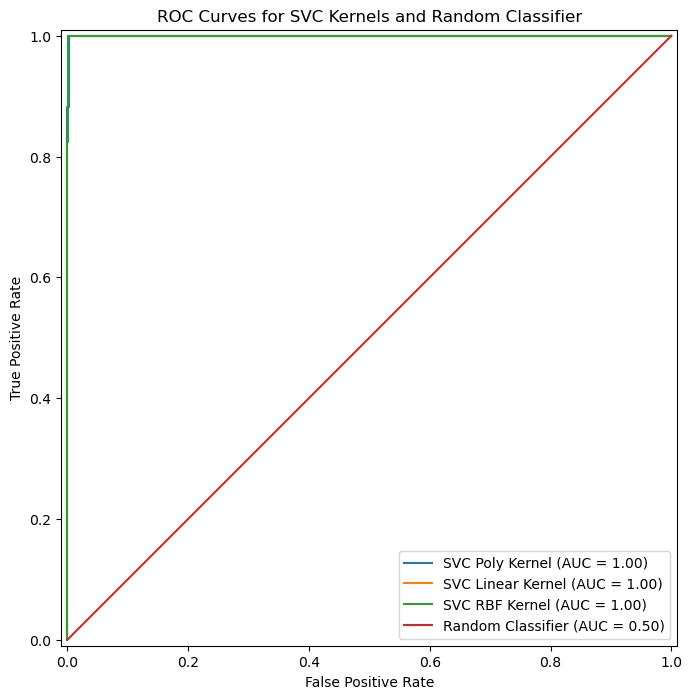

In [41]:
# Import necessary libraries for ROC curve plotting
from sklearn.metrics import RocCurveDisplay
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

# Train the DummyClassifier
dclf = DummyClassifier(strategy='uniform', random_state=0)
dclf.fit(X_train, y_train)

# Create a figure for the ROC curves
plt.figure(figsize=(11, 8))

# Generate ROC curve for the Poly kernel
RocCurveDisplay.from_estimator(models['Poly Kernel'], X_test, y_test, ax=plt.gca(), name='SVC Poly Kernel')

# Generate ROC curve for the Linear kernel
RocCurveDisplay.from_estimator(models['Linear Kernel'], X_test, y_test, ax=plt.gca(), name='SVC Linear Kernel')

# Generate ROC curve for the RBF kernel
RocCurveDisplay.from_estimator(models['RBF Kernel'], X_test, y_test, ax=plt.gca(), name='SVC RBF Kernel')

# Generate ROC curve for the Dummy 
RocCurveDisplay.from_estimator(dclf, X_test, y_test, ax=plt.gca(), name='Random Classifier')

# Adding labels and title
plt.title('ROC Curves for SVC Kernels and Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.show()


In [43]:
#7 Generating PRC curve for all 3 models

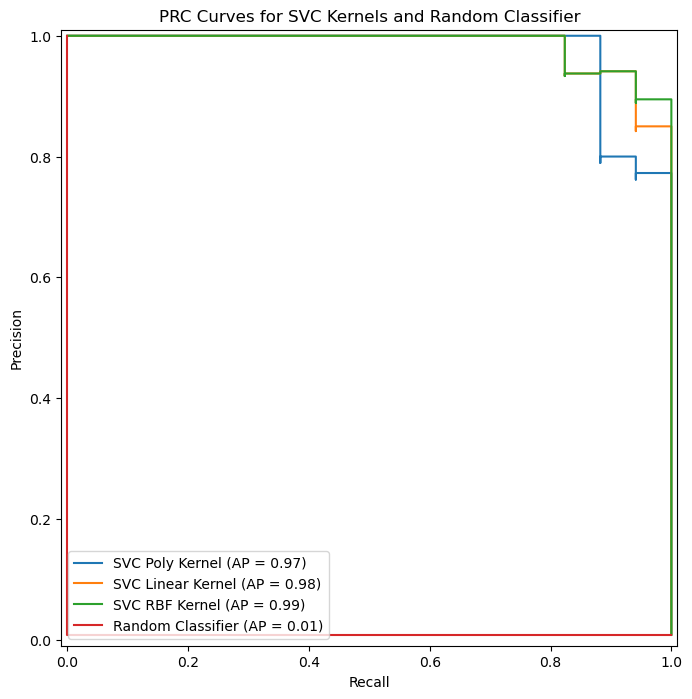

In [45]:
# Import necessary libraries for PRC plotting
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

# Train the DummyClassifier
dclf = DummyClassifier(strategy='uniform', random_state=0)
dclf.fit(X_train, y_train)

# Create a figure for the PRC curves
plt.figure(figsize=(10, 8))

# Generate PRC curve for the Poly kernel SVC
PrecisionRecallDisplay.from_estimator(models['Poly Kernel'], X_test, y_test, ax=plt.gca(), name='SVC Poly Kernel')

# Generate PRC curve for the Linear kernel SVC
PrecisionRecallDisplay.from_estimator(models['Linear Kernel'], X_test, y_test, ax=plt.gca(), name='SVC Linear Kernel')

# Generate PRC curve for the RBF kernel SVC
PrecisionRecallDisplay.from_estimator(models['RBF Kernel'], X_test, y_test, ax=plt.gca(), name='SVC RBF Kernel')

# Generate PRC curve for the random classifier (DummyClassifier)
PrecisionRecallDisplay.from_estimator(dclf, X_test, y_test, ax=plt.gca(), name='Random Classifier')

# Add labels and title
plt.title('PRC Curves for SVC Kernels and Random Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Display the plot
plt.show()


In [47]:
#8 Training a random forest classifier

In [49]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate the accuracy of the Random Forest Classifier
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Output the accuracy
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")


Random Forest Classifier Accuracy: 0.9985


In [51]:
#9 Confusion matrix for Random Forest Classifier model

In [55]:
# Function to output labeled confusion matrix and classification report
def evaluate_rf_model(y_test, y_pred_rf):
    print(f"Evaluation for Random Forest Classifier:\n")
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred_rf)
    
    # Extract TP, TN, FP, FN
    TN, FP, FN, TP = cm.ravel()
    
    # Print labeled confusion matrix results
    print(f"Confusion Matrix for Random Forest Classifier:")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_rf, target_names=['No Intrusion', 'Intrusion']))
    print("-" * 50)

# Make predictions on the test data using the Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest Classifier model
evaluate_rf_model(y_test, y_pred_rf)


Evaluation for Random Forest Classifier:

Confusion Matrix for Random Forest Classifier:
True Negatives (TN): 2001
False Positives (FP): 2
False Negatives (FN): 1
True Positives (TP): 16

Classification Report:
              precision    recall  f1-score   support

No Intrusion       1.00      1.00      1.00      2003
   Intrusion       0.89      0.94      0.91        17

    accuracy                           1.00      2020
   macro avg       0.94      0.97      0.96      2020
weighted avg       1.00      1.00      1.00      2020

--------------------------------------------------
